In [1]:
print("\033[1;34m🌟 Welcome to Emotional Analysis! \033[1;32mStay positive 😊 and keep smiling! 🌈\033[0m")


🌟 Welcome to Emotional Analysis! Stay positive 😊 and keep smiling! 🌈


In this code journey, 

I explored data to be ready for simple prediction!

Label encoding for the target was done!

Preprocessing was done for clean text removing punctuation stopwords!

TF-IDF Vectorization was done to convert cleaned text into numerical features for model input.!
                                                                  
I used Multinomial Naive Bayes, which works well with text data.

Evaluation using accuracy and a classification report, which provides precision,

recall, and F1-score for both positive and negative classes.

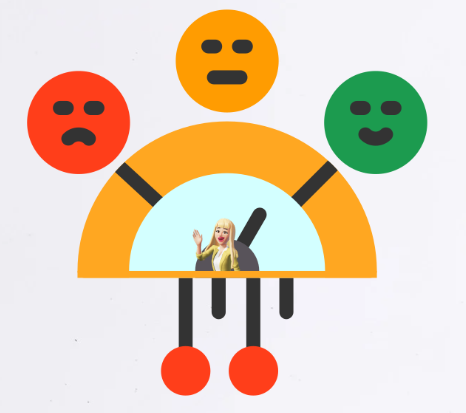

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/steam-reviews/output_steamspy.csv
/kaggle/input/steam-reviews/output.csv


In [3]:
df=pd.read_csv("/kaggle/input/steam-reviews/output.csv")


# Data Exploration

In [4]:
def explore_data(df):
    # Display basic info about the dataframe (column names, data types, and missing values)
    df.info()

    # Print a separator line for readability
    print("x" * 100)

    print("missing values" )
   # Check for missing values
    print(df.isnull().sum())


    # Print a separator line for readability
    print("x" * 100)
    
    # Display summary statistics of the numerical columns (including count, mean, std, etc.)
    print(df.describe().T)
    
    return df

In [5]:
explore_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201151 entries, 0 to 201150
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           201151 non-null  int64 
 1   app_id       201151 non-null  int64 
 2   content      200723 non-null  object
 3   author_id    201151 non-null  int64 
 4   is_positive  201151 non-null  object
dtypes: int64(3), object(2)
memory usage: 7.7+ MB
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
missing values
id               0
app_id           0
content        428
author_id        0
is_positive      0
dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
              count          mean           std           min           25%  \
id         201151.0  1.224624e+08  5.896154e+07  2.090000e+02  7.292665e+07   
app_id     201151.0  4.528997e+02  3.221874e+02  1.000000e+01  

,id,app_id,content,author_id,is_positive
0,181331361,100,At least its a counter strike -1/100,76561199556485100,Negative
1,180872601,100,Uh... So far my playthrough has not been great...,76561199230620391,Negative
2,177836246,100,Better mechanics than cs2,76561198417690647,Negative
3,177287444,100,buggy mess and NOT fun to play at all,76561199077268730,Negative
4,176678990,100,"Whoever came up with this, is gonna fucking ge...",76561199104544266,Negative
...,...,...,...,...,...
201146,118775009,570,This trash for sick anime clowns!,76561198393884121,Negative
201147,118771828,570,Not noob friendly,76561198077888096,Negative
201148,118771331,570,Total trash for anime clowns!,76561198819460083,Negative
201149,182234883,730,Unplayable. It keeps trying to update but then...,76561198084125683,Negative


In [6]:
# Check the distribution of values in the 'is_positive' column
print(df['is_positive'].value_counts())


is_positive
Positive    102660
Negative     98491
Name: count, dtype: int64


# Text Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import string
import re
from nltk.corpus import stopwords

In [8]:
# ensure about content
# Convert 'content' column to string explicitly
df['content'] = df['content'].astype(str)

df['content'] = df['content'].fillna('')


In [9]:
print(df['content'].dtype)

object


In [10]:
# Make label for target
label_encoder = LabelEncoder()
df['is_positive'] = label_encoder.fit_transform(df['is_positive'])

In [11]:
# Preprocess the text
def preprocess_text(text):
    # Convert text to lowercase and remove punctuation using regex
    text = re.sub(f"[{string.punctuation}]", '', text.lower())
    
    # Tokenize the text (split by whitespace)
    words = text.split()

    # Remove stopwords (filtering out words that don't convey sentiment)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word.isalpha()]

    # Join words back into a string
    return ' '.join(words)

In [12]:
# Apply preprocessing to the content column
df['cleaned_content'] = df['content'].apply(preprocess_text)

In [13]:
df['cleaned_content'].head()

0                                 least counter strike
1    uh far playthrough great glitched textures con...
2                                     better mechanics
3                                  buggy mess fun play
4    whoever came gonna fucking get negative review...
Name: cleaned_content, dtype: object

In [14]:
# Split the dataset into training and test sets
X = df['cleaned_content']  # Features (cleaned text)
y = df['is_positive']      # Labels (sentiment)

In [15]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words for efficiency
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [23]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1621810 stored elements and shape (160920, 5000)>

In [24]:
# Modeling
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [25]:
# Evaluate the model
y_pred = model.predict(X_test_tfidf)

In [26]:
# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.8039
Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.74      0.79     19639
    Positive       0.78      0.87      0.82     20592

    accuracy                           0.80     40231
   macro avg       0.81      0.80      0.80     40231
weighted avg       0.81      0.80      0.80     40231



In [27]:
positive_test = "This is an amazing experience."
negative_test = "I don't like to be ...."

for text in [positive_test, negative_test]:
    preprocessed = preprocess_text(text)
    vectorized = vectorizer.transform([preprocessed])
    prediction = model.predict(vectorized)
    print(f"Input: {text}")
    if prediction[0] == 1:
        print("😊 Positive Sentiment")
    else:
        print("😞 Negative Sentiment")


Input: This is an amazing experience.
😊 Positive Sentiment
Input: I don't like to be ....
😞 Negative Sentiment
